<a href="https://colab.research.google.com/github/yeqinghuang516/Auto-Drive/blob/master/ML_Auto_Drive_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Using Texture Features (13 dim)

In [0]:
!cp /content/drive/My\ Drive/Autonomous\ Driving/ML_hog.csv ML_hog.csv

In [0]:
df = pd.read_csv('ML_hog.csv')
df = df.drop(['Unnamed: 0'], axis=1)

## Using Segmented Images (70 $\times$ 320)

In [0]:
!cp /content/drive/My\ Drive/Autonomous\ Driving/ML_segmentation.csv ML_segmentation.csv

In [3]:
num_lines = sum(1 for line in open('ML_segmentation.csv'))
print(num_lines)
df = pd.read_csv('ML_segmentation.csv', skiprows=lambda x: x in np.random.choice(24000, 24000-5000, replace=False))

24109


## Using Downscaled Segmented Images (14 $\times$ 64)

In [0]:
!cp /content/drive/My\ Drive/Autonomous\ Driving/ML_segmentation_resized.csv ML_segmentation_resized.csv

In [0]:
df = pd.read_csv('ML_segmentation_resized.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [0]:
X = df.drop(['angle'], axis=1).to_numpy()
y = df['angle'].to_numpy()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## Perform Dimensionality Reduction

In [0]:
pca = PCA().fit(X)

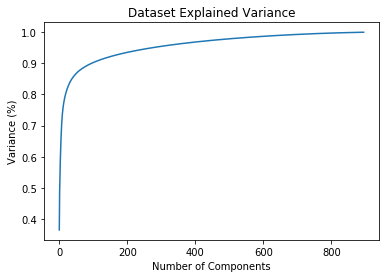

In [5]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [6]:
idx = next(x for x, val in enumerate(np.cumsum(pca.explained_variance_ratio_)) if val > 0.9)
print('The index which has cummulated sum > 0.9 is: ', idx)

The index which has cummulated sum > 0.9 is:  95


In [0]:
pca = PCA(n_components=100).fit(X)
X_reduced = pca.transform(X)

## Train a Regressor using MLP

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [0]:
regressor = MLPRegressor(hidden_layer_sizes=(1024,1024), early_stopping=True, learning_rate='adaptive', n_iter_no_change=100, max_iter=2000)
regressor = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [10]:
regressor.score(X_test, y_test)

0.3515240358556416

In [12]:
reg = pickle.load(open('MLP_segmentation_resized_reduced.sav', 'rb'))
reg.predict(X_test)

ValueError: ignored

In [98]:
reg.predict(X_test)

ValueError: ignored

In [0]:
import pickle
filename = 'MLP_segmentation_resized_reduced.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [0]:
!cp MLP_segmentation_resized_reduced.sav /content/drive/My\ Drive/Autonomous\ Driving/

In [0]:
filename = 'pca_segmentation_resized.sav'
pickle.dump(pca, open(filename, 'wb'))

In [0]:
!cp pca_segmentation_resized.sav /content/drive/My\ Drive/Autonomous\ Driving/

In [0]:
filename = 'scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))

In [0]:
!cp scaler.sav /content/drive/My\ Drive/Autonomous\ Driving/

In [0]:
pca = pickle.load(open('pca_segmentation_resized.sav', 'rb'))

In [0]:
!cp -avr ./agModels-predictClass/ /content/drive/My\ Drive/Autonomous\ Driving